In [25]:
import pandas as pd
import ast
f = pd.read_csv('flickr_tri.csv')
T = []
Omegas = []
min_omegas = []
max_omegas = []
H = []
for i in f.iterrows():
    t = int(i[1][0])
    omegas = ast.literal_eval(i[1][1])
    Omegas.append(omegas)
    T.append(t)
    min_omegas.append(min(omegas))
    max_omegas.append(max(omegas))
    H.append(float(i[1][2]))
    # print(i[1])

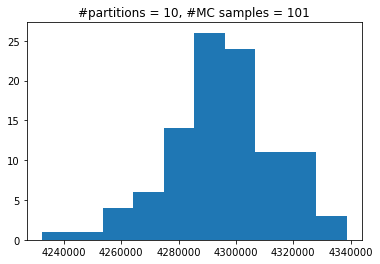

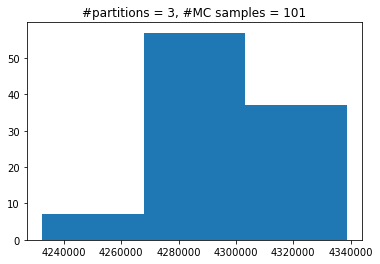

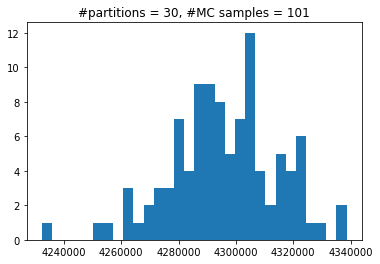

In [53]:
from matplotlib import pyplot as plt
import math
om = Omegas[-1]
# plt.subplots(111,figsize=(10,5))
num_bins = int(math.sqrt(len(om)))
plt.hist(om,bins = num_bins)
plt.title('#partitions = '+str(num_bins)+', #MC samples = '+str(len(om)))
ax= plt.gca(); ax.ticklabel_format(style='plain')
plt.show(); plt.close()

plt.hist(om,bins = num_bins//3)
plt.title('#partitions = '+str(int(num_bins/3))+', #MC samples = '+str(len(om)))
ax= plt.gca(); ax.ticklabel_format(style='plain')
plt.show(); plt.close()

plt.hist(om,bins = num_bins*3)
plt.title('#partitions = '+str(num_bins*3)+', #MC samples = '+str(len(om)))
ax= plt.gca(); ax.ticklabel_format(style='plain')
plt.show(); plt.close()

In [1]:
import os,json
# from unittest import result
import networkx as nx
from src.utils import *
from src.algorithm import Algorithm,ApproximateAlgorithm
from src.query import Query,wQuery,multiGraphQuery,multiGraphwQuery
import pandas as pd
from datetime import datetime
from reduce_main import singleQuery_singleRun

usage: ipykernel_launcher.py [-h] [-d DATASET] [-a ALGO] [-u UTYPE] [-k K]
                             [-v] [-s SOURCE] [-t TARGET] [-pr PROPERTY]
                             [-K K] [-ea EST_ALGO] [-q QUERYF] [-b BUCKETING]
                             [-dh HOP] [-db]
ipykernel_launcher.py: error: unrecognized arguments: --ip=127.0.0.1 --stdin=9003 --control=9001 --hb=9000 --Session.signature_scheme="hmac-sha256" --Session.key=b"e5cafa30-791f-49c4-935a-ab143b22dc1a" --shell=9002 --transport="tcp" --iopub=9004 --f=c:\Users\naheedanjum.arafat\AppData\Roaming\jupyter\runtime\kernel-v2-183049gHcijtMf7G9.json


SystemExit: 2

c:\Users\naheedanjum.arafat\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
dataset = 'default'
property = 'reach'
source = 's'
target = 'y'
dhopreach = False 
hop = -1
k = 1 
G = get_dataset(dataset)
os.environ['time_seed'] = 'True'
if property == 'reach':
    if dhopreach:
        print('#<d-hop reachability (',source,',',target,')')
        Q = Query(G, 'reach_d',args = {'u':source,'v':target, 'd':hop})
    else:
        print('Reachability(',source,',',target,')')
        Q = Query(G,'reach',{'u':source,'v':target})

if property == 'sp':
    print('Shortest path')
    Q = wQuery(G,'sp',{'u':source,'v':target})
if property == 'tri':
    print('#Triangles')
    Q = Query(G,'tri')
a = Algorithm(G, Q, debug = True)
print("Greedy algorithm (w/ exact mem.): ")
a.algorithm5(k = k, update_type='o1', verbose = False)
M = a.algostat['M']
hatMList = []
for K in range(2,10):
    Q = Query(G,'reach',{'u':source,'v':target})
    a = ApproximateAlgorithm(G, Q, debug = True)
    a.algorithm5(property = Q.qtype, algorithm = 'exact', \
                    k = k, K = K, update_type='o1', verbose = False)
    hatMList.append(a.algostat['M'])
    print(a.algostat['result']['edges'])

weighted graph? =>  False
Reachability( s , y )
Greedy algorithm (w/ exact mem.): 
Iteration:  0
{1: {('x', 'y'): 0.8333333333333334, ('s', 'x'): 0.0, ('s', 'y'): 0, ('s', 'u'): 2.0}}
[('s', 'u')]
Iteration:  0
{1: {('x', 'y'): 0.5555555555555556, ('s', 'x'): 0.0, ('s', 'y'): 0, ('s', 'u'): 0}}
[('s', 'x')]
Iteration:  0
{1: {('x', 'y'): 0.8333333333333334, ('s', 'x'): 0, ('s', 'y'): 0, ('s', 'u'): 0}}
[('s', 'x')]
Iteration:  0
{1: {('x', 'y'): 1.0, ('s', 'x'): 0, ('s', 'y'): 0, ('s', 'u'): 0}}
[('x', 'y')]
Iteration:  0
{1: {('x', 'y'): 0, ('s', 'x'): 0, ('s', 'y'): 0, ('s', 'u'): 0}}
[('x', 'y')]
Iteration:  0
{1: {('x', 'y'): 0, ('s', 'x'): 0, ('s', 'y'): 0, ('s', 'u'): 0}}
[('x', 'y')]
Iteration:  0
{1: {('x', 'y'): 0, ('s', 'x'): 0, ('s', 'y'): 0, ('s', 'u'): 0}}
[('x', 'y')]
Iteration:  0
{1: {('x', 'y'): 0, ('s', 'x'): 0, ('s', 'y'): 0, ('s', 'u'): 0}}
[('x', 'y')]


In [18]:
hatMList[-1].items()

dict_items([(1, {('x', 'y'): 0, ('s', 'x'): 0, ('s', 'y'): 0, ('s', 'u'): 0})])

In [19]:
hatMList[-3]

{1: {('x', 'y'): 0, ('s', 'x'): 0, ('s', 'y'): 0, ('s', 'u'): 0}}

In [25]:
M

{0: {('x', 'y'): 0.18000000000000002,
  ('s', 'x'): 0.12000000000000004,
  ('s', 'y'): 0.0,
  ('s', 'u'): 0.22800000000000004},
 1: {('x', 'y'): 0.8200000000000001,
  ('s', 'x'): 0.88,
  ('s', 'y'): 1.0,
  ('s', 'u'): 0.772}}

### ER N vs dH Plot

In [2]:
# pr = 'tri'
# pr = 'sp'
pr='reach'
# alg = 'appr'
# alg = 'mcdij'
alg = 'mcbfs'
# alg = 'mcapproxtri'
# data = 'ER_15_22'
# data = 'flickr'
# data = 'rome'
data = 'biomine'
_max = -1
# invert = True
invert = False
loop = 'N' # 'T'
epsilon = 0.001
# epsilon = 0.03
for q in [2]:
# for q in [1,2,3,4]:
# for q in [1]:
    qset = str(q)+'.queries.csv'
    fname = 'output/measure_'+data+'_'+alg+'_'+pr+'_'+qset 
    print(fname)
    import pandas as pd
    df = pd.read_csv(fname)
    # print(df.head())
    if invert:
        df  = df.iloc[::-1]
        # df = df.reindex(index=df.index[::-1])
    avg_df = df.groupby(loop)[['N','T','H']].mean()
    # avg_df = df
    # print(avg_df)
    avg_df['dHdN'] = avg_df['H'].diff()/avg_df[loop].diff()
    # if q == 2:
    #     print(avg_df)
    _filter = avg_df[avg_df['dHdN'].abs()<=epsilon]
    # print(_filter)
    Nstar = _filter.iloc[0][loop]
    print(qset, ' => ',Nstar)
    _max = max(Nstar,_max)
print(_max)
# avg_df

output/measure_biomine_mcbfs_reach_2.queries.csv
2.queries.csv  =>  16.0
16.0


In [3]:
pr = 'tri'
# pr = 'sp'
# pr='reach'
# alg = 'appr'
# alg = 'mcdij'
# alg = 'mcbfs'
alg = 'mcapproxtri'
# data = 'ER_15_22'
data = 'flickr'
# data = 'rome'
# data = 'biomine'
_max = -1
# invert = True
invert = False
loop = 'N' # 'T'
epsilon = 0.001
# epsilon = 0.03
for q in [1]:
# for q in [1,2,3,4]:
# for q in [1]:
    # qset = str(q)+'.queries.csv'
    qset = str(q)+'.queries_NLoops.csv'
    fname = 'output/measure_'+data+'_'+alg+'_'+pr+'_'+qset 
    print(fname)
    import pandas as pd
    df = pd.read_csv(fname)
    # print(df.head())
    if invert:
        df  = df.iloc[::-1]
        # df = df.reindex(index=df.index[::-1])
    avg_df = df.groupby(loop)[['N','T','H']].mean()
    # avg_df = df
    # print(avg_df)
    avg_df['dHdN'] = avg_df['H'].diff()/avg_df[loop].diff()
    # if q == 2:
    #     print(avg_df)
    _filter = avg_df[avg_df['dHdN'].abs()<=epsilon]
    # print(_filter)
    Nstar = _filter.iloc[0][loop]
    print(qset, ' => ',Nstar)
    _max = max(Nstar,_max)
print(_max)
# avg_df

output/measure_flickr_mcapproxtri_tri_1.queries_NLoops.csv
1.queries_NLoops.csv  =>  26.0
26.0


#### Approximation error

In [139]:
trial=("MC", "mcapproxtri")
reachal=("MC" , "MC+BFS","PT-MC", "PT-MC+BFS", "RSS", "PT-RSS")
spal=( "MC" ,"PT-MC", "MC+DIJ", "PT-MC+DIJ")

df = pd.read_csv('output/stats.csv')
print('---------- Reach ----------')
for al in reachal:
    cond = (df['algorithm'] == 'exact') & (df['P'] == 'reach')
    exact_df = df.loc[cond].sort_values(['source','target'])
    cond2 = (df['algorithm'] == al) & (df['P'] == 'reach')
    algo_df = df.loc[cond2].sort_values(['source','target'])
    diff = exact_df['H'].values - algo_df['H'].values
    print(al,' ','reach',' => ',diff.mean(),' ',diff.std())

print('-------- SP ----------')
for al in spal:
    cond = (df['algorithm'] == 'exact') & (df['P'] == 'sp')
    exact_df = df.loc[cond].sort_values(['source','target'])
    cond2 = (df['algorithm'] == al) & (df['P'] == 'sp')
    algo_df = df.loc[cond2].sort_values(['source','target'])
    # print(algo_df.shape)
    diff = exact_df['H'].values - algo_df['H'].values
    print(al,' ','reach',' => ',diff.mean(),' ',diff.std())

print('------- Tri ------')
for al in trial:
    cond = (df['algorithm'] == 'exact') & (df['P'] == 'tri')
    exact_df = df.loc[cond].sort_values(['source','target'])
    cond2 = (df['algorithm'] == al) & (df['P'] == 'tri')
    algo_df = df.loc[cond2].sort_values(['source','target'])
    print(algo_df.shape)
    diff = exact_df['H'].values - algo_df['H'].values
    print(al,' ','reach',' => ',diff.mean(),' ',diff.std())


---------- Reach ----------
MC   reach  =>  0.012359925549999998   0.06000295148575332
MC+BFS   reach  =>  0.012216604899999997   0.039079468724471406
PT-MC   reach  =>  0.4581718035999991   0.3441089797363643
PT-MC+BFS   reach  =>  0.012216604899999997   0.039079468724471406
RSS   reach  =>  0.24611493593715328   0.05846700894532092
PT-RSS   reach  =>  0.24611493593715328   0.05846700894532092
-------- SP ----------
MC   reach  =>  -0.005780552249999982   0.09007400686589298
PT-MC   reach  =>  0.9877332686500013   0.7175680854470233
MC+DIJ   reach  =>  0.0220001465   0.1257182127424024
PT-MC+DIJ   reach  =>  0.0220001465   0.1257182127424024
------- Tri ------
(1, 13)
MC   reach  =>  -0.01529226442852849   0.0
(1, 13)
mcapproxtri   reach  =>  0.020440661320366926   0.0


In [83]:

# declare -a trial=("exact" "appr" "mcapproxtri")
# declare -a reachal=("exact" "appr" "eappr" "mcbfs" "pTmcbfs"  "rss" "pTrss")
# declare -a spal=("exact" "appr" "eappr" "mcdij" "pTmcdij")
# ## reach
# for al in "${reachal[@]}" 
# do
#     python measure_main_PeakMem.py -a $al -N 11 -T 85 -pr reach -d ER_15_22 -q data/queries/ER/ER_15_22_1.queries -S
#     python measure_main_PeakMem.py -a $al -N 11 -T 85 -pr reach -d ER_15_22 -q data/queries/ER/ER_15_22_2.queries -S
#     python measure_main_PeakMem.py -a $al -N 11 -T 85 -pr reach -d ER_15_22 -q data/queries/ER/ER_15_22_3.queries -S 
#     python measure_main_PeakMem.py -a $al -N 11 -T 85 -pr reach -d ER_15_22 -q data/queries/ER/ER_15_22_4.queries -S 
# done

# ### sp
# for al in "${spal[@]}" 
# do
#     python measure_main_PeakMem.py -a $al -N 26 -T 165 -pr sp -d ER_15_22 -q data/queries/ER/ER_15_22_1.queries -S
#     python measure_main_PeakMem.py -a $al -N 26 -T 165 -pr sp -d ER_15_22 -q data/queries/ER/ER_15_22_2.queries -S
#     python measure_main_PeakMem.py -a $al -N 26 -T 165 -pr sp -d ER_15_22 -q data/queries/ER/ER_15_22_3.queries -S 
#     python measure_main_PeakMem.py -a $al -N 26 -T 165 -pr sp -d ER_15_22 -q data/queries/ER/ER_15_22_4.queries -S 
# done

# ### tri
# for al in "${trial[@]}" 
# do
#     python measure_main_PeakMem.py -a $al -N 6 -T 100 -pr tri -d ER_15_22 -q data/queries/ER/ER_15_22_1.queries -S
# done

### Print Edge probability mean & std

In [211]:
from src.utils import get_dataset
import numpy as np
# datasets = ['ER_15_22','products','papers','restaurants']
datasets = ['flickr','biomine','rome']
for dataset in datasets:
    G = get_dataset(dataset)
    V = G.count_nodes()
    print('dataset: ',dataset)
    print('|V|= ',V)
    ep = []
    for e in G.edict:
        ep.append(G.get_prob(e))
    print('mean p(e) = ',np.mean(ep))
    print('std p(e) = ', np.std(ep))

weighted graph? =>  False
dataset:  ER_15_22
|V|=  15
mean p(e) =  0.5086363636363637
std p(e) =  0.3012292309633593
weighted graph? =>  False
dataset:  products
|V|=  2173
mean p(e) =  0.17264777859249222
std p(e) =  0.09432428458258477
weighted graph? =>  False
dataset:  papers
|V|=  995
mean p(e) =  0.25518923678886407
std p(e) =  0.225087539705383
weighted graph? =>  False
dataset:  restaurants
|V|=  857
mean p(e) =  0.18057781088384225
std p(e) =  0.06751525073398532


## Ehsan

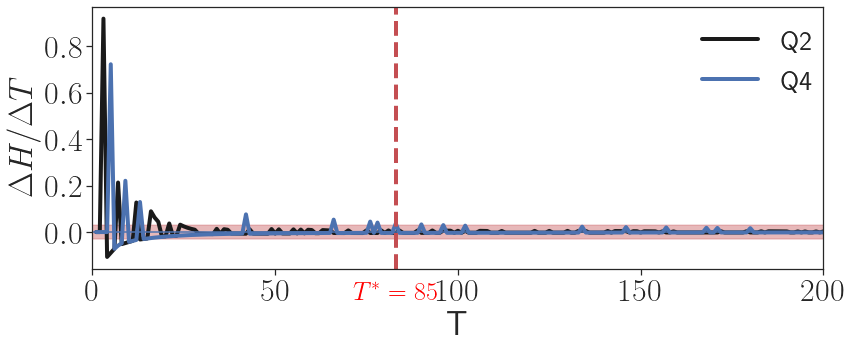

In [207]:
# H vs Reach Plot
import os 
import pandas as pd 
parpath = "Ehsan_shared/ER/T_loop/measure_appr_reach_MoE_and_H_derivatives_added.csv"
df = pd.read_csv(parpath)
df = df[['T_values', 'H_Q1_Derivatives',
       'H_Q2_Derivatives', 'H_Q3_Derivatives', 'H_Q4_Derivatives']]
df.columns = ['T','Q1','Q2','Q3','Q4']
df = df[['T','Q2','Q4']]
opt_T = 85

from matplotlib import pyplot as plt 
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
sns.set(rc={'figure.figsize':(12,5)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
# plt.style.use('grayscale')
fontsize = 34
labelsize = 26
lw = 4

# lstyles = ['dotted','dashed','dashdot','solid',(0,(5,1)),(0,(1,1)),(0, (3, 5, 1, 5))]
# markers = ['.','s','v','o','<','>', 'D']
markers = [None,None,None,None]
# sns.lineplot(x='T', y='Q1', data=df,marker = markers[0], label = 'Q1', linewidth=lw, markersize=12,color='g')
sns.lineplot(x='T', y='Q2', data=df,marker = markers[1], label = 'Q2', linewidth=lw, markersize=8,color='k')
# sns.lineplot(x='T', y='Q3', data=df,marker = markers[2], label = 'Q3', linewidth=lw, markersize=12,color='r')
sns.lineplot(x='T', y='Q4', data=df,marker = markers[3], label = 'Q4', linewidth=lw, markersize=8,color='b')
x = np.arange(df.shape[0])
zero = np.zeros_like(x)
eps = np.ones_like(x)*0.03
plt.plot(x, zero, 'b-')
plt.fill_between(x, zero - eps, zero + eps, color='r', alpha=0.4)
ax = plt.gca()
ax.axvline(opt_T-2,linestyle='--',color='r',linewidth=lw)
ax.text(opt_T-2, -.05, '$T^*='+str(opt_T)+'$', color='red', fontsize = fontsize-8, \
        transform=ax.get_xaxis_transform(), ha='center', va='top')
# ax1.axvline(50)

plt.ylabel('$\Delta H/\Delta T$',fontsize=fontsize)
plt.xlabel('T',fontsize=fontsize)
plt.xticks([0,50,100,150,200],fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
plt.xlim((0,200))
plt.legend(loc = 'upper left', fontsize=fontsize+6, bbox_to_anchor=(0.8,1.01),frameon = False,prop={"size":28})
plt.tight_layout()
os.system('mkdir -p figs/')
plt.savefig('figs/er_appr_reach_TvsDerH.pdf')
plt.show()